In [27]:
import qutip.qip.operations.gates
!pip install qutip

In [28]:
import numpy as np
from qutip import *
import cmath
import matplotlib as mpl
from pylab import *
from qutip import *
from matplotlib import cm
import imageio


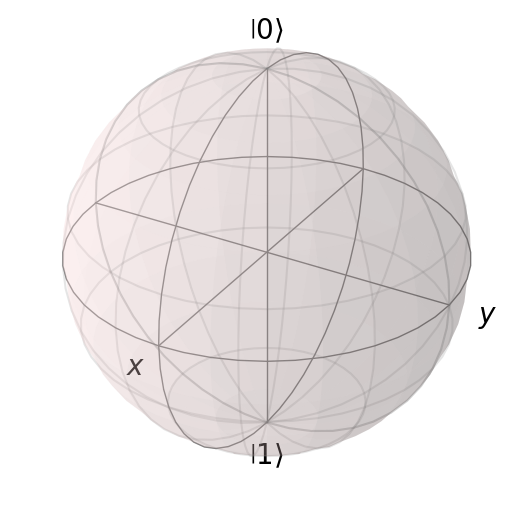

In [29]:

# Crear una instancia de la esfera de Bloch
b = qutip.Bloch()
b.make_sphere()
b.show()


In [30]:
def rotate(theta, fi):
    states = []
    thetas = np.linspace(0,theta,21)
    for p_theta in thetas:
        states.append(
            (np.cos(p_theta/2)*basis(2,0)
            + np.sin(p_theta/2)*basis(2,1)).unit())

    fis = np.linspace(0,fi,21)

    for p_fi in fis:
        states.append(
            (np.cos(theta/2)*basis(2,0)
            + np.sin(theta/2)*cmath.exp(1j*p_fi)*basis(2,1)).unit())

    return states


In [38]:
def animate_bloch(states, file_name, duration=0.1, save_all=False):

    b = Bloch()
    b.vector_color = ['r']
    b.view = [-40,30]
    images=[]
    try:
        length = len(states)
    except:
        length = 1
        states = [states]
    ## normalize colors to the length of data ##
    nrm = mpl.colors.Normalize(0,length)
    colors = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

    ## customize sphere properties ##
    b.point_color = list(colors) # options: 'r', 'g', 'b' etc.
    b.point_marker = ['o']
    b.point_size = [30]

    for i in range(length):
        b.clear()
        b.add_states(states[i])
        b.add_states(states[:(i+1)],'point')
        if save_all:
            b.save(dirc='tmp') #saving images to tmp directory
            filename="tmp/bloch_%01d.png" % i
        else:
            filename='temp_file.png'
            b.save(filename)
        images.append(imageio.imread(filename))
    imageio.mimsave(file_name, images, duration=duration)

In [39]:
states =  rotate(np.pi/2,0)
animate_bloch(states, file_name='bloch_anim0.gif', duration=0.1, save_all=False)

/var/folders/3r/51f3tcjs1k5fl9jj4r__t11c0000gn/T/ipykernel_78997/236053884.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
